In [1]:
from param_analysis import ParameterAnalysis
from plots import *
import numpy as np
import matplotlib.pyplot as plt
import metrics as cm

In [4]:
RESULTS_FILE = "data/ecb_c"
""" Configuration for hypothesis 2"""

connectedness_values = np.linspace(0.2,0.8,15)
ecb_precision_gammas = np.linspace(3.5,9,15)
#ecb_precision_gammas = np.append(ecb_precision_gammas, False)
num_agent_values = [12]

n = len(num_agent_values)
c = len(connectedness_values)
env_precision_gammas = [9]
b_precision_gammas = [6]
lr = [0.0]
variances = [0.1]
r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 50

In [5]:

params = ParameterAnalysis('','', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, lr, variances, n_trials)
data = params.load_results(RESULTS_FILE)
all_parameters = np.array(list(params.get_param_combinations()))

In [6]:
""" This is equivalent to running params.get_overall_metrics()  except includes resampling rate"""


clustering_consensus = np.zeros(len(all_parameters))

for i, combo in enumerate(all_parameters):
    params.update_params(combo) #update the parameters to be the current combination
    params.get_sim_results_from_files() #load the results from the file
    clustering_consensus[i] = cm.clustering_consensus(params.all_qs)


In [7]:

def get_2d_histogram(param1, param2, conditional_parameters, conditional_metric, param1_index, param2_index):
    hist = np.zeros((len(param1), len(param2)))
    for i, e in enumerate(param1):
        indices = np.where(conditional_parameters[:,param1_index] == e)[0]
        _params = conditional_parameters[indices]
        metrics = conditional_metric[indices]
        for j, l in enumerate(param2):
            p2_indices = np.where(_params[:,param2_index]==l)[0]
            p2_params = _params[p2_indices]
            p2_metrics = metrics[p2_indices]
            avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])
            hist[i,j] = avg_metric
    return hist

In [8]:

def plot_2d_histogram(hist, x_label, y_label, param1, param2):
    fig = plt.figure(figsize = (12,12))
    im2 = plt.imshow(hist)
    #im2 = plt.contourf(hist)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label,fontsize = 18)
    plt.xticks(np.arange(0,len(param2),1), labels = param1.round(2),fontsize = 18)
    plt.yticks(np.arange(0,len(param1),1), labels = param2.round(2),fontsize = 18)
    plt.colorbar()
    plt.savefig("Figure 4b")
    plt.title("Resampling Rate", fontsize=25)
    return im2

In [11]:
ecb_b_db_clustering_hist_std = get_2d_histogram(ecb_precision_gammas, connectedness_values, all_parameters, clustering_consensus, 2, 1)


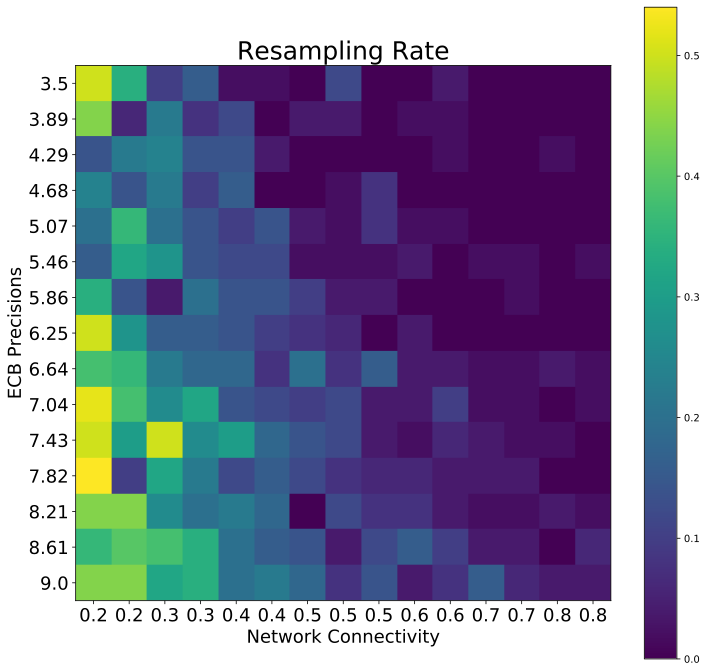

In [12]:
%config InlineBackend.figure_format = 'svg'

plot_2d_histogram(ecb_b_db_clustering_hist_std, "Network Connectivity", "ECB Precisions", connectedness_values.round(1), ecb_precision_gammas)

